In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.metrics import (
    confusion_matrix, classification_report,
    accuracy_score, roc_curve, auc, jaccard_score
)
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import (
    Dense, Flatten, Input, Conv2D, MaxPooling2D, UpSampling2D
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator


## **Zad2**

In [ ]:
data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential([
    Dense(16, activation='relu', input_shape=(X.shape[1],)),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.1)

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")
print("Dokładność:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Macierz pomyłek - Breast Cancer")
plt.xlabel("Przewidywana")
plt.ylabel("Rzeczywista")
plt.show()


## **Zad3**

Epoch 1/50


D:\Python projects\pythonProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.2126 - loss: 1.1670 - val_accuracy: 0.3333 - val_loss: 1.0994
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2440 - loss: 1.1455 - val_accuracy: 0.5000 - val_loss: 1.0443
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4283 - loss: 1.0144 - val_accuracy: 0.5833 - val_loss: 0.9949
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4749 - loss: 0.9640 - val_accuracy: 0.5833 - val_loss: 0.9490
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6019 - loss: 0.8910 - val_accuracy: 0.6667 - val_loss: 0.9048
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6136 - loss: 0.8674 - val_accuracy: 0.7500 - val_loss: 0.8664
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6375 - loss: 0.8106 - val_accuracy: 0.7500 - val_loss: 0.8292
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7406 - loss: 0.7463 - val_accuracy: 0.8333 - val_loss: 0.

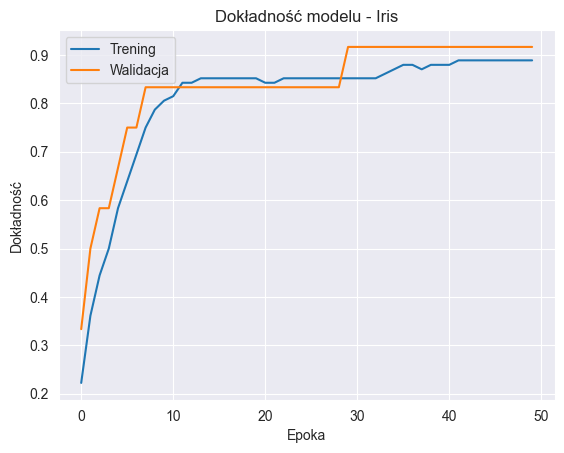

In [3]:
data = load_iris()
X = data.data
y = data.target


y_cat = to_categorical(y)

# Podział i normalizacja
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = Sequential([
    Dense(16, activation='relu', input_shape=(X.shape[1],)),
    Dense(3, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.1)

plt.plot(history.history['accuracy'], label='Trening')
plt.plot(history.history['val_accuracy'], label='Walidacja')
plt.title("Dokładność modelu - Iris")
plt.xlabel("Epoka")
plt.ylabel("Dokładność")
plt.legend()
plt.show()

# **Zad 4**

In [ ]:
data_dir = r"VGG"
img_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # zamrażamy wagi

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

model.compile(
    optimizer=optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    epochs=5,
    validation_data=val_generator
)


val_loss, val_acc = model.evaluate(val_generator)
print(f"Dokładność walidacyjna: {val_acc:.2%}")


Y_pred = model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = val_generator.classes

conf_mat = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(conf_mat, cmap='Blues', annot=False, fmt='d')
plt.title('Macierz Pomyłek')
plt.xlabel('Predykcja')
plt.ylabel('Prawdziwa klasa')
plt.show()


print("\n=== Raport klasyfikacji ===")
print(classification_report(y_true, y_pred, target_names=list(val_generator.class_indices.keys())))

# **Zad 5**

zamiast COCO wykorzsytamy, wbudowany dataset w tensorflow.keras cifar10 o podobnych załozeniach

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


model.fit(x_train, y_train_cat, validation_split=0.1, epochs=10, batch_size=64)


y_pred_probs = model.predict(x_test)


fpr, tpr, roc_auc = {}, {}, {}
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test_cat[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure(figsize=(10, 8))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f"Klasa {i} (AUC = {roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Krzywe ROC dla CIFAR-10")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# **Zad 6**

Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.3343 - loss: 1.1035 - val_accuracy: 0.3329 - val_loss: 1.0988
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3332 - loss: 1.0988 - val_accuracy: 0.3349 - val_loss: 1.0986
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3341 - loss: 1.0987 - val_accuracy: 0.3352 - val_loss: 1.0986
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.3332 - loss: 1.0987 - val_accuracy: 0.3349 - val_loss: 1.0986
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.3341 - loss: 1.0986 - val_accuracy: 0.3328 - val_loss: 1.0986
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.3347 - loss: 1.0986 - val_accuracy: 0.3345 - val_loss: 1.0986
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.3339 - loss: 1.0986 - val_accuracy: 0.3348 - val_loss: 1.0986
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.3355 - loss: 1.0986 - val_accuracy: 0.3326 - val_loss: 1.0986


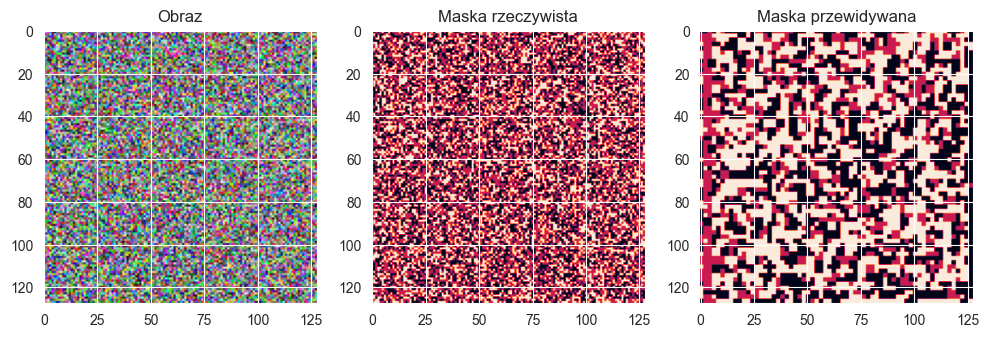

In [6]:
IMG_HEIGHT, IMG_WIDTH = 128, 128
NUM_CLASSES = 3  # np. droga, niebo, budynki – uproszczenie


def build_segmentation_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # Encoder
    x = Conv2D(32, 3, activation='relu', padding='same')(inputs)
    x = MaxPooling2D()(x)
    x = Conv2D(64, 3, activation='relu', padding='same')(x)
    x = MaxPooling2D()(x)

    # Decoder
    x = UpSampling2D()(x)
    x = Conv2D(64, 3, activation='relu', padding='same')(x)
    x = UpSampling2D()(x)
    outputs = Conv2D(num_classes, 1, activation='softmax', padding='same')(x)

    return Model(inputs, outputs)


def generate_dummy_data(n_samples=100):
    X = np.random.rand(n_samples, IMG_HEIGHT, IMG_WIDTH, 3)
    y = np.random.randint(0, NUM_CLASSES, size=(n_samples, IMG_HEIGHT, IMG_WIDTH))
    y = tf.one_hot(y, NUM_CLASSES)
    return X, y.numpy()

# Generowanie danych
X_train, y_train = generate_dummy_data(80)
X_test, y_test = generate_dummy_data(20)


model = build_segmentation_model((IMG_HEIGHT, IMG_WIDTH, 3), NUM_CLASSES)
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


model.fit(X_train, y_train, epochs=10, batch_size=8, validation_split=0.1)


y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=-1)
y_true_classes = np.argmax(y_test, axis=-1)

# Miara IoU
ious = []
for i in range(len(y_true_classes)):
    flat_pred = y_pred_classes[i].flatten()
    flat_true = y_true_classes[i].flatten()
    ious.append(jaccard_score(flat_true, flat_pred, average='macro'))
print("Średni IoU:", np.mean(ious))

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(X_test[0])
plt.title("Obraz")
plt.subplot(1, 3, 2)
plt.imshow(y_true_classes[0])
plt.title("Maska rzeczywista")
plt.subplot(1, 3, 3)
plt.imshow(y_pred_classes[0])
plt.title("Maska przewidywana")
plt.show()

In [2]:
import zipfile
import requests
from io import BytesIO

url = "https://github.com/alexgkendall/SegNet-Tutorial/archive/refs/heads/master.zip"

print("Pobieranie danych z GitHuba...")
r = requests.get(url)
z = zipfile.ZipFile(BytesIO(r.content))
z.extractall("camvid_data")  # rozpakowanie do lokalnego folderu

print("Gotowe! Dane znajdują się w 'camvid_data/SegNet-Tutorial-master/CamVid'")


Pobieranie danych z GitHuba...
Gotowe! Dane znajdują się w 'camvid_data/SegNet-Tutorial-master/CamVid'


Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 22s 473ms/step - accuracy: 0.2401 - loss: 2.0697 - val_accuracy: 0.4737 - val_loss: 1.7932
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 19s 460ms/step - accuracy: 0.5314 - loss: 1.5422 - val_accuracy: 0.6066 - val_loss: 1.4176
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 19s 460ms/step - accuracy: 0.6022 - loss: 1.2730 - val_accuracy: 0.5830 - val_loss: 1.3305
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 20s 465ms/step - accuracy: 0.6140 - loss: 1.1978 - val_accuracy: 0.6164 - val_loss: 1.2138
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 19s 463ms/step - accuracy: 0.6138 - loss: 1.1856 - val_accuracy: 0.6259 - val_loss: 1.1951
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 19s 462ms/step - accuracy: 0.6297 - loss: 1.1441 - val_accuracy: 0.6121 - val_loss: 1.2168
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 19s 458ms/step - accuracy: 0.6422 - loss: 1.1029 - val_accuracy: 0.6316 - val_loss: 1.1510
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 20s 470ms/step - accuracy: 0.6492 - loss: 1.0656 - val_accu

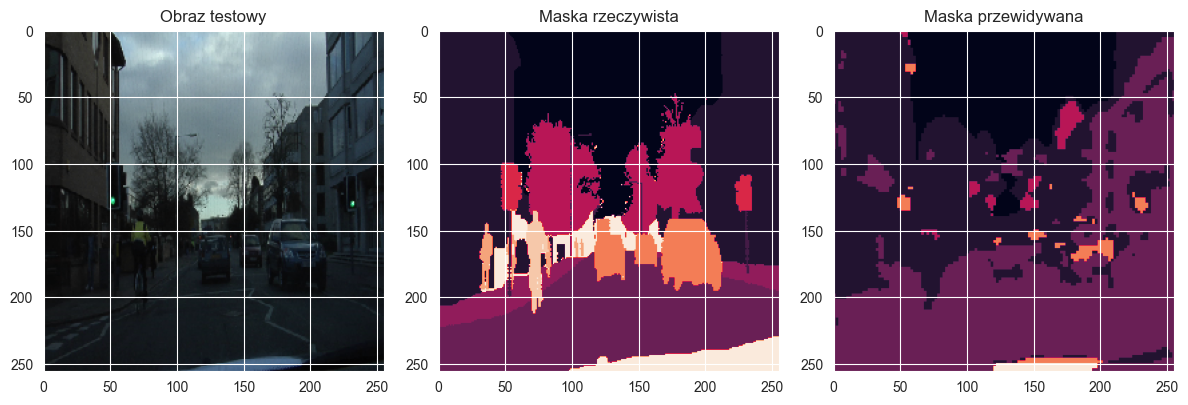

In [10]:
from pathlib import Path

IMG_HEIGHT, IMG_WIDTH = 256, 256
NUM_CLASSES = 12

# === Funkcja do ładowania danych ===
def load_camvid_data(image_dir, mask_dir, size=(IMG_HEIGHT, IMG_WIDTH)):
    image_paths = sorted(Path(image_dir).glob("*.png"))
    mask_paths = sorted(Path(mask_dir).glob("*.png"))
    X, y = [], []
    for img_p, mask_p in zip(image_paths, mask_paths):
        img = tf.keras.preprocessing.image.load_img(img_p, target_size=size)
        img = np.array(img) / 255.0
        mask = tf.keras.preprocessing.image.load_img(mask_p, color_mode='grayscale', target_size=size)
        mask = np.array(mask).astype(np.uint8)
        X.append(img)
        y.append(mask)
    X = np.array(X)
    y = tf.one_hot(y, NUM_CLASSES).numpy()  # one-hot encoding masek
    return X, y

X_train, y_train = load_camvid_data("camvid_data/SegNet-Tutorial-master/CamVid/train", "camvid_data/SegNet-Tutorial-master/CamVid/trainannot")
X_test, y_test = load_camvid_data("camvid_data/SegNet-Tutorial-master/CamVid/test", "camvid_data/SegNet-Tutorial-master/CamVid/testannot")

# === Model segmentacyjny ===
def build_segmentation_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Conv2D(32, 3, activation='relu', padding='same')(inputs)
    x = MaxPooling2D()(x)
    x = Conv2D(64, 3, activation='relu', padding='same')(x)
    x = MaxPooling2D()(x)
    x = UpSampling2D()(x)
    x = Conv2D(64, 3, activation='relu', padding='same')(x)
    x = UpSampling2D()(x)
    outputs = Conv2D(num_classes, 1, activation='softmax', padding='same')(x)
    return Model(inputs, outputs)

model = build_segmentation_model((IMG_HEIGHT, IMG_WIDTH, 3), NUM_CLASSES)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# === Trenowanie ===
model.fit(X_train, y_train, epochs=10, batch_size=8, validation_split=0.1)

# === Predykcja i metryki ===
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=-1)
y_true_classes = np.argmax(y_test, axis=-1)

ious = []
for i in range(len(y_true_classes)):
    ious.append(jaccard_score(y_true_classes[i].flatten(), y_pred_classes[i].flatten(), average='macro'))

print("Średni IoU:", np.mean(ious))

# === Wizualizacja wyników ===
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(X_test[0])
plt.title("Obraz testowy")

plt.subplot(1, 3, 2)
plt.imshow(y_true_classes[0])
plt.title("Maska rzeczywista")

plt.subplot(1, 3, 3)
plt.imshow(y_pred_classes[0])
plt.title("Maska przewidywana")

plt.tight_layout()
plt.show()